In [1]:
#If we talk about classification problems, the most common metrics used are:
#- Accuracy
#- Precision (P)
#- Recall (R)
#- F1 score (F1)
#- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC)
#- Log loss
#- Precision at k (P@k)
#- Average precision at k (AP@k)
#- Mean average precision at k (MAP@k)


#When it comes to regression, the most commonly used evaluation metrics are:
#- Mean absolute error (MAE)
#- Mean squared error (MSE)
#- Root mean squared error (RMSE)
#- Root mean squared logarithmic error (RMSLE)
#- Mean percentage error (MPE)
#- Mean absolute percentage error (MAPE)
#- R2

In [3]:
# for balanced dataset - binary classification problem 
    # we use accuracy, precision, recall, f1 

# tp, tn, fp (type I error), fn (Type II error)

# accuracy : describing how accurate the model is (not good for skewed datasets)
    # (tp+tn)/(tp+tn+fp+fn)

# precision : tp/(tp+fp)
# recall : tp/(tp+fn) - same as tpr (true positive rate / senstivity)
# false positive rate (fpr) = fp/(tn+fp) ; 1-fpr = true negative rate (specificity)

# MOST IMPORTANT ARE TPR AND FPR 


# both of above ranges from 0 to 1 and closer to 1 is better 

# how we select the probability threshold greatly impact the value of precision and recall 
 # precision - recall curve : curve of precision and recall for different values of threshold 
    
# f1 score = 2pr/(p+r) , ranging from 0 to 1 (use this for skewed datasets)

# ROC Curve : TPR (on y-axis), FPR (on x-axis) {for different value of threshold}
# - area under this curve is Area under the ROC curve 
# AUC (area under curve) = 1 : perfect model
# AUC = 0 : very bad 
# AUC = 0.5 : totally random

# an AUC of 0.85 means the if we select a positive and a negative sample from dataset
# the model will rank the postive sample higher then the negative sample with a probability of 0.85 



In [4]:
# thresholds are used to make predictions 
# value of threshold can be selected from ROC Curve 
# we want to minimize false positives, and maintain the true positives

# log loss : -ylog(y^) + (1-y)log(1-y^)

In [5]:
# for multi class classification problem 


# following are all one vs all approaches 

# macro-averaged  : calculate precision for all classes and average them
# micro-averaged  : calculate class wise tp,etc then sum and then calculate overall precision
# weighted  : same as macro, with weighted average (wrt number of samples )

In [6]:
# confusion matrix  (prediction {vertical}, actual {top horizontal})


In [8]:
# multi-label classification (Each sample can have one or more classes associated with it)
# eg detect all objects present in an image 

# for such problems we use 

# precision at k {considering only top k predictions } - number of hits (intersection of true and predicted labels)/k
# average precision at k - e.g., ap@3 = average(p@1, p@2, p@3)
# mean average precision at k - mean (avg) of ap@k (from 1 to k)
# log loss - mean column wise log loss (convert targets to binary and use log loss for each column)

# ranging from 0 to 1



In [1]:
# Regression Metrics 

In [2]:
# Error : actual_value - predicted_value
# absolute error : abs(error)
# mean absolute error : mean(all absolute errors)

# squared error : (actual - predicted)^2
# mean squared error : mean (all squared errors)
# root mean squared error : sqrt ( MSE )

# Squared logrithmic error  :( log(1+actual)-log(1+predicted) )^2 
# mean squared logrithmic error : mean (of all squared logrithmic errors)
# root mean squared logrithmic error : sqrt(MSLE)

# percentage error : ((actual - predicted)/actual)*100 %
# mean percentage error 
# mean absolute percentage error 

# R2 (R squared) (cooficient of determination) (0 to 1) (1 being good, 0 being bad) (can also be negative {absurd predictions})
# 1 -  (  sum all squared errors/sum of (actual - mean of actual)^2  )
# 1 - RSS/TSS
# RSS = Sum of square of residuals(errors)
# TSS = total sum of squares (actual - mean)^2




In [3]:
# advanced metrics 

In [4]:
# cohen's kappa : used for classification (measures the aggrement between two ratings (i.e. how close they are to each other))
# closer to 1 is better, closer to 0 is bad 

# MCC Mathews correlation coefficient (for classification) (-1 to 1) (-1 is bad , 0 is random , 1 is good)
# uses tp,tn,fp,fn and is thus good for skewed data 

In [1]:
from sklearn import metrics

In [14]:
print('accuracy : ',metrics.accuracy_score([0,1],[1,1]))
print('Precision : ',metrics.precision_score([0,1],[1,1]))
print('Recall : ',metrics.recall_score([0,1],[1,1]))
print('f1_score : ',metrics.f1_score([0,1],[1,1]))


# precision recall curve 

prec,rec,threh=metrics.precision_recall_curve([0,0,1,1],[0.3,0.4,0.45,0.5])

for x in range(len(threh)):
    print('for threshold: ',threh[x], ' precision = ',prec[x], ', recall = ',rec[x])

    
# AUC 

fpr, tpr, thresholds = metrics.roc_curve([0,0,1,1],[0.3,0.4,0.45,0.5], pos_label=2) # x should be montonically incr/decre
for x in range(len(thresholds)):
    print('for threshold: ',thresholds[x], ' TPR = ',tpr[x], ', FPR = ',fpr[x])


print('log loss  : ',metrics.log_loss([0,1],[0.4,0.7]))

accuracy :  0.5
Precision :  0.5
Recall :  1.0
f1_score :  0.6666666666666666
for threshold:  0.3  precision =  0.5 , recall =  1.0
for threshold:  0.4  precision =  0.6666666666666666 , recall =  1.0
for threshold:  0.45  precision =  1.0 , recall =  1.0
for threshold:  0.5  precision =  1.0 , recall =  0.5
for threshold:  1.5  TPR =  nan , FPR =  0.0
for threshold:  0.5  TPR =  nan , FPR =  0.25
for threshold:  0.3  TPR =  nan , FPR =  1.0
log loss  :  0.4337502838523616


C:\Users\umar.khan2\Anaconda3\envs\cm\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [21]:
#multi class (macro, micro, weighted averages):

y_true=[0,0,1,1,2,2]
y_pred=[0,0,2,0,1,2]

print(metrics.precision_score(y_true, y_pred, average="macro"))
print(metrics.precision_score(y_true, y_pred, average="micro"))
print(metrics.precision_score(y_true, y_pred, average="weighted"))


print(metrics.recall_score(y_true,y_pred,average="macro"))


0.38888888888888884
0.5
0.38888888888888884
0.5


Text(0.5, 23.5, 'Predicted Labels')

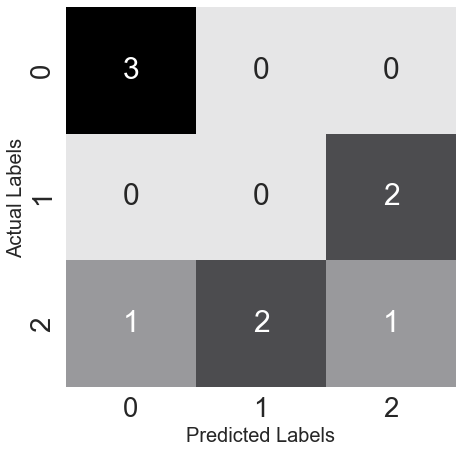

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(7, 7))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)